In [54]:
### Import libraries ###
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# Motivation
It is well known that in order to obtain the roots of a polynomial of 2nd degree we can use the cudaratic formula:
$$ x{1,2} = \frac{-b+-\sqrt{b^2-4ac}}{2a} $$

However, there are equations like $ f (x) = e^{– x} - x $  for which it is not possible to find its  analyticalsolution. In such cases, the only alternative is a to use a technic in order to find an aproximate solution

## Closed Methods
This methods  take advantage of the fact that a function changes sign in the vicinity of a root. These techniques are
called closed, or interval methods, because it takes two initial values to
the root. As the name implies, these initial values must "enclose" both sides of the root. The particular methods described here employ different strategies to systematically reduce the size of the interval and thus converge to the
correct answer. 

**Note:** In order to find the interval a graphical tool is needed, though you could guess the correct interval.


### 1 Bisection Method:
When a function  $f(x)$ passes throguh its roots, it changes signs. In general, if $f(x)$ is real and continues in theinterval $[l,u]$ and $f(l)$ and $f(u)$ have opposite signs, that is:

$$ f(l)f(u) < 0 $$
Then $ f(x) $ has at least 1 root

**STEPS:**

<ol>
    <li>Select $l$ and $u$ such that  the root $r \in [l,u]$ This can be verified with $ f(l)f(u) < 0 $ </li>  
    <li>Generate an approximation of the root $r$  with the following expression: $r= \frac{l+u}{2}$</li>   
    <li>Perform the following assessments to determine which subinterval the root belongs</li>   
    <ol>
        <li>If $ f(l)f(r) < 0 $ than the root is in the left interval, therefore u=r, go back to step 2. </li>
        <li>If $ f(l)f(r) > 0 $ than the root is in the right interval, therefore l=r, go back to step 2.</li>
        <li>If $ f(l)f(r) = 0 $ we have found the root r=r, finish the iteration.</li>
    </ol>
</ol>

**Example:** 
Find the roots for  $  f(x) = x^2 - 2x  - 10 $

**Step 1: Select l and u**

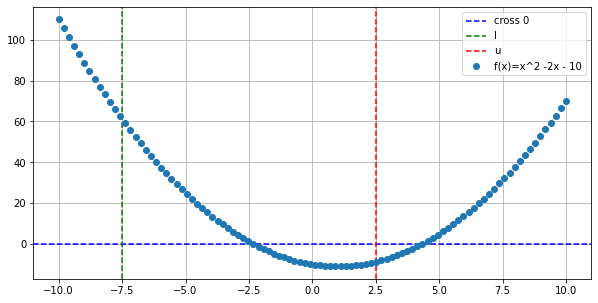

In [3]:

### In order to find an interval for we first need to plot the function ###
x = np.linspace(-10,10,100)
f_x =  x**2 - 2*x  - 10
### Plot ###
plt.figure(figsize=(10,5))
plt.axhline(y=0, color='blue', linestyle='--',label="cross 0") # plot zero line
plt.axvline(x=-7.5, color='green', linestyle='--',label="l") # plot zero line
plt.axvline(x=2.5, color='red', linestyle='--',label="u") # plot zero line
plt.plot(x,f_x,"o",label="f(x)=x^2 -2x - 10")
plt.legend()
plt.grid()

With this plot we selcet $l=-7.5$ and $u=2.5$ .Since $f(u)f(l)<0$ then it is guaranteed at least one root exists

**Step 2 and Step3:**

In [4]:
def bisection(l,u,n,f):
    """ Performs bisection method: Returns 1 root Input:
    l: Lower bound type(int or float)
    u: Upper bound type(int or float)
    n: Number of iterations type(int)
    f: Function to evalualte type(lambda funtion)"""
    initial_test = f(l)*f(u)                 # intitial test 
    
    if initial_test > 0:                     # Sanity check: Verify f(l)f(u)<0 if not, raise error
         raise Exception(f"No root in interval [{l},{u}]")
            
    else:                                    # If the initial test was passed
        for ite in range(0,n+1):             # Iterate n times
            r = (l+u)/2                      # Compute the approximation of root 
            test=f(l)*f(r)                   # Compute test 
            if test < 0:                     # If f(l)f(r)<0 then root is in the interval  [l, r=u]
                u=r                          # Therefor set new u to r
            elif test > 0:                   # If f(l)f(r)>0 then the root is in the interval [r=l,u]
                l=r                          # Therefor set new u to l
            elif test == 0:                  # If f(l)f(r)=0 We have found the root.
                print("Root has been found") # Tell the user we have found the root 
                break                        # Break loop
    return r,ite

## try function ##
l=-7.5
u=2.5
n=100
f = lambda x:  x**2 - 2*x - 10
r,iterations = bisection(l,u,n,f)
print(f"Found root {r} in {iterations} iterations")

Root has been found
Found root -2.3166247903554 in 53 iterations


<br>
<br>


## Open Methods
In the closed methods,the root is within a predetermined range by a lower limit and an upper limit. Repeated iteration of these methods always produce approximations closer to the root. Such methods are convergent because they progressively approach the root as that progresses in the calculation.

In contrast, open methods are based on formulas requiring only a single starting value x or starting with a pair of
them, but they do not necessarily contain the root. These sometimes diverge as the calculation procees, however, when open methods converge, they generally do so much faster than closed methods.

### 1 Simple Iteration of  Fixed Point
**Fixed point Theroem**

If $g:[l,u] \to [l,u] $ is continous and differentiable in $[l,u]$ with $| g^{'}(x)|	\leq k \leq 1 \forall x \in [l,u], $ and $ x_0 \in [l,u] $, then the iteration is expressed as:
$$ x_n = g(x_{n-1})$$
Therefore  this iterations is convergent:
$$ \lim _{n \to \infty} x_n = r $$
Where $r$ is the root of the equation  $ x= g(x) $

**Steps:**
<ol>
    <li>Transform $f(x)=0$ to  $x=g(x)$ such that $ g(x)$ satisfies the Fixed point theorem</li>
    <li> Iterate over step 1 </li>
</ol>

**Example:**
Find the roots for $f(x)=x-e^{-x}$

By definition the root of the function satisfies the following propertie:  $x-e^{-x}=0$

Convert $x-e^{-x}=0$  to  $x=g(x)$ adding x by both sides: $x=e^{-x}$ 

In [57]:
def fixed_point(x_o,g_x,n):
    r = x_o              # change the intial guess to potential root
    r_vec =[]            # root vector for ploting purposes
    for _ in range(0,n): # Iterate n times
        r = g_x(r)       # New root comes from g_x
        r_vec.append(r)  # append to see evolution of roots
    return r,r_vec

x_o  = 0                   # Intial guess
f_x=lambda x: x-np.exp(-x) # Function (we will not use this but lets put it in order to see it)
g_x=lambda x: np.exp(-x)   # g(x) function
n= 5                       # Number of iterations
r,r_vec=fixed_point(xi,g_x,n) # Call fucntion
print(r)                   # Print root approximation

0.6062435350855974


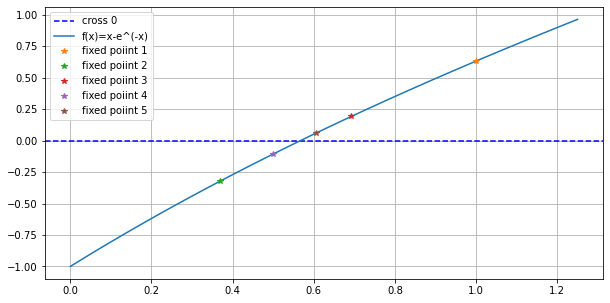

In [58]:
### lets  plot the function to see how the algorithm works  ###
x = np.linspace(0,1.25,50) # define a small vector
f_x = x-np.exp(-x)         # Get f_x
### Plot ###
plt.figure(figsize=(10,5))                                     # Set size of plot
plt.axhline(y=0, color='blue', linestyle='--',label="cross 0") # plot zero line
plt.plot(x,f_x,"-",label="f(x)=x-e^(-x)")                      # Plot function

### ploot history of roots ###
for i,r in enumerate(r_vec):                                 
    plt.plot(r,r-np.exp(-r),"*",label=f"fixed poiint {i+1}")

## Make plot Pretty ###
plt.legend()
plt.grid()

### 2 Newton Rapson
If $f:[l,u] \in R \to R $ is continous and differentaible in $[l,u]$ with $f(l)f(u) < 0$ and $ f^{'} \neq 0 $ in $[l,u]$ There exsists a $x_0 \in [l,u] $ such that:
$$ x_{n+1} = x_{n} - \frac{f(x_n)}{f^{'}(x_n)},n > 0 $$

for which:

$$ \lim{n \to \infty} f(x_n) =0 $$

Therefore $x_n$ is a root 

**EXAMPLE:** <br>
Find one root for $x^6 -x -1 $

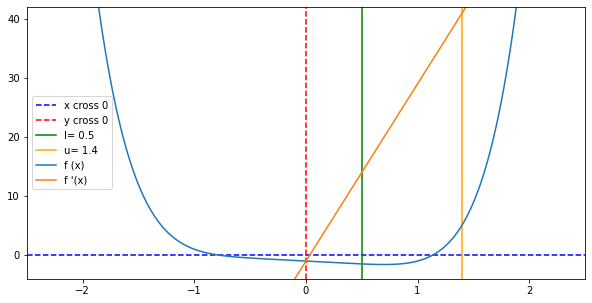

In [59]:
x = np.linspace(-2,2,200)
f_x = x**6 -x -1
f1_x = 6*x*5 -1

### Plot ###
plt.figure(figsize=(10,5))                                     # Set size of plot
plt.axhline(y=0, color='blue', linestyle='--',label="x cross 0") # plot zero  horizontal line
plt.axvline(x=0, color='red', linestyle='--',label="y cross 0") # plot zero line
plt.axvline(x=0.5, color='green', linestyle='-',label="l= 0.5") # plot zero line
plt.axvline(x=1.4, color='orange', linestyle='-',label="u= 1.4") # plot zero line

plt.plot(x,f_x,"-",label="f (x)")                               # Plot function
plt.plot(x,f1_x,"-",label="f '(x)")                             # Plot function

### Make plot pretty ###
plt.ylim((-4,42))
plt.xlim((-2.5,2.5))
plt.legend(loc="best")
plt.show()

With this graphical example we can appreciate that near $0$,  $f^{'}(x)$  is equal to $0$ so if an interval passes throught this point we can not apply Newtons Method. To apply this method  we select the interval  $[l=0.5,u=1.4]$

In [75]:

def Newton_Rapson(x_o,l,u,f_x,f1_x,n):
    """ Newton Rapson Method:
    x_o:  Intial guess of root    type(float)
    l:    Lower bound of interval type(float)
    u:    Upper bound of interval type(float)
    f_x:  Function to evaluate    type(lambda)
    f1_x: First derivative of f_x type(lambda)
    n:    Number of Iterations    type(int)
    """
    r = x_o              # change the intial guess to potential root
    r_vec =[]            # root vector for ploting purposes
    
    if f_x(l)*f_x(u) < 0:          # Check if there is a root in interval 
        for _ in range(0,n):       # Iterate n times
            r = r - f_x(r)/f1_x(r) # Newton Rapson Method
            r_vec.append(r)        # append to see evolution of roots
            
    else:
        raise Exception(f"No root in interval [{l},{u}]") # Raise error if no root in interval
        
    return r,r_vec

### Lets apply the function ###
l = 1                       # Lower bound
x_o = 1.5                   # Intial guess for root l < x_o < u
u = 2                       # Upper bound    
f_x  = lambda x: x**6 -x -1 # Function
f1_x = lambda x: 6*x*5 -1   # Derivative of Function
n=40                        # Number of iterations
r,r_vec = Newton_Rapson(x_o,l,u,f_x,f1_x,n) # Apply Function
print(f"Rood found at {r}") # Print Root

Rood found at 1.1347241936133872


## 3 Secant Method (do not use this method, use Secant Modifie instead) 
A potential issue when implementing Newton-Raphson is the derivative evaluation. Although this is not a disadvantage for polynomials nor for many other functions, there are some functions whose derivatives sometimes very difficult to calculate. In such cases, the derivative can be approximated by a backwards finite difference:

$$ f^{'}(x_i) = \frac{f(x_{i-1})- f(x_i)}{x_{i-1} - x_i} $$

This means that the secant method needs 2 initial points $x_{i-1}$ and $x_i$:

$$ x_{n+1} = x_{n} - \frac{f(x_n) }{f^{'}(x_n)} = x_{n} - f(x_n) \frac{x_{i-1} - x_i }{f(x_{i-1})- f(x_i)} $$

This comes from Newton Rapson so in order to work it needs to pass the Newton-Rapson Theorem, explained in section 2


In [106]:
def secant(x,x_1,l,u,f_x,n):
    """ Secant Method:
    x:    Intial guess of root             type(float)
    x_1:  Previous point for intial guess  type(float)
    l:    Lower bound of interval          type(float)
    u:    Upper bound of interval          type(float)
    f_x:  Function to evaluate             type(lambda)
    n:    Number of Iterations             type(int)
    """
    r_vec = []
    if f_x(l)*f_x(u) < 0:           # Check if there is a root in interval
    
        for iteration in range(0,n):             # Iterate n times
            try:
                f1_x = (x_1-x)/(f_x(x_1)-f_x(x)) # Estiamte the inverse of the first derivative
                x_1 = x                          # Save x as previous point
                x = x - f_x(x)*f1_x              # Compute Netwon Raspon with Secant variation 
                r_vec.append(r_vec)              # Save Results
            except:
                # IF we get to close to the root the enxt value will not change much, this will cause a porblem
                print(f"Can not go futrther than  itration {iteration} ") 
                break
    else: 
         raise Exception(f"No root in interval [{l},{u}]") # Raise error if no root in interval
    return x, r_vec

### Lets apply the function ###
l = 1                       # Lower bound
x= 1.5                      # Intial guess for root l < x_o < u
x_1= 1.499                  # xi-1, previous point to intial guess 
u = 2                       # Upper bound 
f_x  = lambda x: x**6 -x -1 # Function
n=10                        # Number of iterations

r,r_vec = secant(xi,xi_1,l,u,f_x,n) # Apply Function
print(f"Rood found at {r}") # Print Root

Can not go futrther than  itration 9 
Rood found at 1.1347241384015194


## 3.1 Secant Modefied
Instead of using two arbitrary values to approximate the derivative, an alternative method considers a fractional change of the independent variable to estimate $ƒ ^{′}(x)$: 


$$ f^{'}(x_i) = \frac{f(x_{i} + \Delta x_i)- f(x_i)}{\Delta x_i} $$

Which leads to:

$$ x_{n+1} = x_{n} - \frac{f(x_n) }{f^{'}(x_n)} = x_{n} - f(x_n) \frac{\Delta  x_i }{f(x_{i}+\Delta x_i)- f(x_i)} $$

<font color="red"> You will see that this is better than the normal Secant Method, since  it only need 1 intial point </font>

In [109]:
def secant_modified(x,dx,l,u,f_x,n):
    """ Secant Modified Method:
    x:    Intial guess of root    type(float)
    dx:   Step                    type(float)
    l:    Lower bound of interval type(float)
    u:    Upper bound of interval type(float)
    f_x:  Function to evaluate    type(lambda)
    n:    Number of Iterations    type(int)
    """
    r_vec = []
    if f_x(l)*f_x(u) < 0:           # Check if there is a root in interval
    
        for iteration in range(0,n):           # Iterate n times
            try:
                f1_x = (dx)/(f_x(x+dx)-f_x(x)) # Estiamte the inverse of the first derivative
                x = x - f_x(x)*f1_x            # Compute Netwon Raspon with Secant variation 
                r_vec.append(r_vec)            # Save Results
            except:
                # IF we get to close to the root the enxt value will not change much, this will cause a porblem
                print(f"Can not go futrther than  itration {iteration} ") 
                break
    else: 
         raise Exception(f"No root in interval [{l},{u}]") # Raise error if no root in interval
    return x, r_vec

### Lets apply the function ###
l = 1                       # Lower bound
x= 1.5                      # Intial guess for root l < x_o < u
dx= 0.01                    # derivative step
u = 2                       # Upper bound 
f_x  = lambda x: x**6 -x -1 # Function
n=30                        # Number of iterations

r,r_vec = secant_modified(xi,dx,l,u,f_x,n) # Apply Function
print(f"Rood found at {r}") # Print Root

Rood found at 1.1347241384015194
